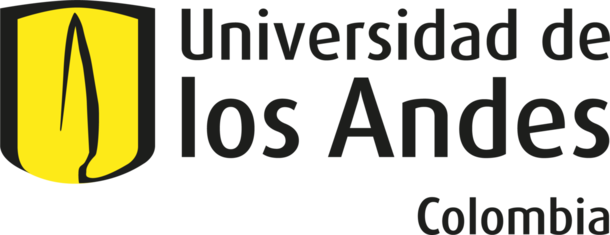

__ISIS3301 - Inteligencia de Negocios__

<div align="center">

## **Laboratorio 2: Regresión**
-------------------------------------

</div>


*   *Julián Castro - 202020847* #Estudiante 3
*   *Alejandro Gómez - 202015122* #Estuadiante 2
*   *Jonathan Rivera -202022864* #Estudiante 1


## Objetivos



* Construir modelos analíticos para estimar una variable objetivo continua a partir de un conjunto de variables observadas.


* Comprender el proceso para la construcción de modelos analíticos que responden a una tarea de regresión.


* Automatizar el proceso de construcción de modelos analíticos con el uso de pipelines de tal forma que puedan ser usados en ambientes de producción.


* Extraer información útil para el negocio a partir de los resultados de los modelos de regresión.

## Caso de Negocio: Predicción de muertes per capita de cáncer

La Organización Mundial de la Salud está piloteando un nuevo programa de financiamiento que busca intervenir en poblaciones con un alto número de fallecimientos debido al cáncer. El objetivo es permitirle a los gobiernos nacionales y locales invertir en programas de diagnóstico temprano, instalaciones de tratamiento, entrenamiento de personal hospitalario y financiamiento de la investigación en esta enfermedad. Debido a que este programa busca beneficiar al mediano y largo plazo poblaciones vulnerables, se ha determinado la necesidad de crear un modelo predictivo para empezar interviniendo poblaciones que, dadas sus características, tengan un alto número de muertes por cáncer aunque no haya registros completos u oficiales.

Para ello y de la mano del gobierno norteamericano, la OMS ha recopilado datos de Estados Unidos para la creación del modelo a partir de diversas características demográficas y del estado de los servicios de salud de una población para determinar el número de muertes por cáncer por cada 100.000 habitantes. El objetivo, es que este modelo permita tomar decisiones de la asignación de finaciamiento del nuevo programa, además de determinar qué datos son relevantes y cuáles no lo son para la estimación y la recolección de información.

-----------------------------------------------

La OMS desea que usted los apoye en la construcción del modelo de regresión previamente descrito utilizando algunas de las etapas de la metodología "ASUM-DM":




__1. Entendimiento de los datos:__ Describir la característica más relevantes de los datos, incluir el análisis de calidad de datos y hacer una preselección de las variables más importantes para la etapa de modelado.


__2. Preparación de datos:__ Solucionar cualquier problema de calidad de datos previamente identificado. Además, debe aplicar cualquier proceso de preprocesamiento de datos necesario para la construcción del modelo de regresión.


__3. Modelado:__ Utilizando las variables previamente seleccionadas, construir un modelo de regresión que estime la variable objetivo con el menor error posible.


__4. Evaluación cuantitativa:__ A partir de las métricas seleccionadas para evaluar y seleccionar el mejor modelo, explicar el resultado obtenido desde el punto de vista cuantitativo. Contestar a la pregunta: ¿Su equipo recomienda utlizar en producción el modelo de estimación de precios de portátiles o es preferible continuar haciendo estimaciones de forma manual? En caso de no recomendar el uso del modelo, ¿qué recomendaciones haría para continuar iterando con el objetivo de la construcción de un mejor modelo?


__5. Evaluación cualitativa:__ Debe estar compuesta de dos partes:
- Validación de supuestos: Realizar los ajustes necesarios para que el modelo cumpla con los supuestos necesarios para la inferencia estadística con regresiones.
- Interpretación de los coeficientes: Realizar la interpretación de los coeficientes de la regresión, identificando las variables más relevantes para la estimación y como afectan la variable objetivo.


__6. Visualización de los resultados:__ Integrar el resultado obtenido con el modelo de regresión a un tablero de control para apoyar el objetivo de la empresa.


7. Exportar el mejor modelo (utilizando pipelines) para poder ser usado sobre datos nuevos en el ambiente de producción del cliente.


8. Generar predicciones sobre los datos de prueba que no se encuentran etiquetados utilizando el mejor modelo. Exportar las predicciones en formato CSV utlizando como base el mismo archivo de datos de prueba.

--------------------------------
# **1. Entendimiento de los datos**
--------------------------------

In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm
import scipy.stats as stats


In [3]:
# Se cargan los datos. 
df =pd.read_csv("./data/202410_Laboratorio 2 - Regresión_train_data.csv", sep=',', encoding = "ISO-8859-1")

In [4]:
# Tamaño del dataset: Filas y columnas
df.shape

(2132, 34)

In [5]:
# Se visualiza una muestra de los registros del dataset
df.sample(5)

avgAnnCount  avgDeathsPerYear  incidenceRate  medIncome  popEst2015  \
21           32.0                11          533.1      51929        3796   
1720        222.0               106          469.2      30860       35162   
1189        105.0                56          325.8      32083       22776   
2068        252.0               114          460.6      50753       45386   
1494       5834.0              2059          455.3      33687     1455444   

      povertyPercent  studyPerCap           binnedInc  MedianAge  \
21              12.2     0.000000  (51046.4, 54545.6]       46.8   
1720            27.8     0.000000    [22640, 34218.1]       44.3   
1189            23.2     0.000000    [22640, 34218.1]       45.5   
2068            17.0   176.265809  (48021.6, 51046.4]       40.7   
1494            31.5   241.163521    [22640, 34218.1]       33.2   

      MedianAgeMale  ...  PctEmpPrivCoverage PctPublicCoverage  \
21             45.5  ...                43.7              38.3   
1720           43.1  ...                28.9              48.1   
1189           43.1  ...                33.8              50.3   
2068           39.7  ...                48.4              33.3   
1494           30.9  ...                29.5              52.0   

      PctPublicCoverageAlone   PctWhite   PctBlack  PctAsian  PctOtherRace  \
21                      15.1  97.327852   0.693731  0.282631      0.000000   
1720                    28.8  95.153025   1.548654  0.000000      0.334079   
1189                    33.0  95.576088   2.669676  0.485396      0.272503   
2068                    17.1  95.125759   1.963328  0.743118      0.270425   
1494                    38.2  20.993981  33.281456  3.672541     37.859023   

      PctMarriedHouseholds  BirthRate  deathRate  
21               59.138533   8.874172      171.3  
1720             47.729436   6.348580      221.7  
1189             51.546283   6.462372      175.8  
2068             50.842275   6.601566      205.6  
1494             27.309229   5.678902      162.0  

[5 rows x 34 columns]

In [6]:
# Revisar las características de los datos: completitud y tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2132 non-null   float64
 1   avgDeathsPerYear         2132 non-null   int64  
 2   incidenceRate            2132 non-null   float64
 3   medIncome                2132 non-null   int64  
 4   popEst2015               2132 non-null   int64  
 5   povertyPercent           2132 non-null   float64
 6   studyPerCap              2132 non-null   float64
 7   binnedInc                2132 non-null   object 
 8   MedianAge                2132 non-null   float64
 9   MedianAgeMale            2132 non-null   float64
 10  MedianAgeFemale          2132 non-null   float64
 11  Geography                2132 non-null   object 
 12  AvgHouseholdSize         2132 non-null   float64
 13  PercentMarried           2132 non-null   float64
 14  PctNoHS18_24            

La columna`binnedInc` representa el ingreso mediano per capita del condado, para que esta información sea util debe ser representada de forma numerica, sin embargo se encuentra representada por el rango del decil en el que se encuentra el condado, por lo tanto si se desea usar, sera neceario tranformar esta informacion, esto se hara en la fase de preparacion de datos.

In [7]:
# Resumen de los estadisticos de las variables numéricas
df.describe()

avgAnnCount  avgDeathsPerYear  incidenceRate      medIncome  \
count   2132.000000       2132.000000    2132.000000    2132.000000   
mean     613.385785        183.537992     448.816467   47029.474203   
std     1435.393846        507.649052      53.582307   12107.930677   
min        6.000000          3.000000     201.300000   22640.000000   
25%       77.000000         28.000000     421.600000   38875.750000   
50%      174.500000         62.000000     453.549422   45207.000000   
75%      515.250000        141.000000     481.600000   52376.250000   
max    38150.000000      14010.000000    1014.200000  125635.000000   

         popEst2015  povertyPercent  studyPerCap    MedianAge  MedianAgeMale  \
count  2.132000e+03     2132.000000  2132.000000  2132.000000    2132.000000   
mean   1.025064e+05       16.889681   158.003002    44.298687      39.559475   
std    3.442282e+05        6.415614   533.636824    39.522898       5.208212   
min    8.290000e+02        3.200000     0.000000    23.500000      22.800000   
25%    1.154725e+04       12.200000     0.000000    37.700000      36.300000   
50%    2.693200e+04       15.900000     0.000000    40.900000      39.600000   
75%    6.663525e+04       20.300000    79.275307    44.000000      42.600000   
max    1.017029e+07       47.400000  9439.200444   619.200000      64.700000   

       MedianAgeFemale  ...  PctEmpPrivCoverage  PctPublicCoverage  \
count      2132.000000  ...         2132.000000        2132.000000   
mean         42.140009  ...           41.237899          36.305113   
std           5.272267  ...            9.326155           7.847326   
min          22.800000  ...           13.500000          11.200000   
25%          39.000000  ...           34.600000          30.975000   
50%          42.300000  ...           41.300000          36.400000   
75%          45.400000  ...           47.600000          41.425000   
max          65.700000  ...           70.700000          65.100000   

       PctPublicCoverageAlone     PctWhite     PctBlack     PctAsian  \
count             2132.000000  2132.000000  2132.000000  2132.000000   
mean                19.282786    83.686321     9.132512     1.260485   
std                  6.136426    16.588379    14.613785     2.745672   
min                  2.600000    10.199155     0.000000     0.000000   
25%                 14.900000    77.560360     0.614838     0.263542   
50%                 18.900000    90.122747     2.214754     0.538013   
75%                 23.200000    95.600016    10.709158     1.190457   
max                 46.600000   100.000000    85.947799    42.619425   

       PctOtherRace  PctMarriedHouseholds    BirthRate    deathRate  
count   2132.000000           2132.000000  2132.000000  2132.000000  
mean       1.953356             51.228950     5.643918   179.000047  
std        3.484569              6.565620     1.980214    27.416156  
min        0.000000             22.992490     0.000000    59.700000  
25%        0.278374             47.749949     4.520411   161.875000  
50%        0.781727             51.595091     5.383877   178.550000  
75%        2.171349             55.398869     6.478029   195.300000  
max       37.859023             78.075397    21.326165   293.900000  

[8 rows x 32 columns]

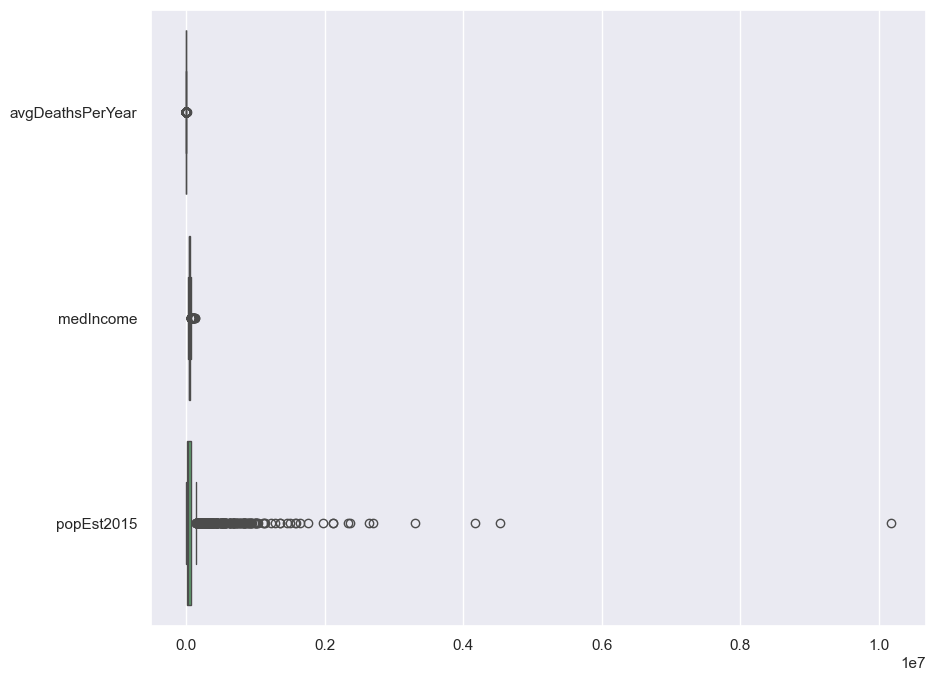

In [8]:
#Visualización de todas las variables numéricas.
name_cosl_int = df.select_dtypes(include=['int64']).columns
fig=plt.figure(figsize=(10,8))
ax = sns.boxplot(data=df[name_cosl_int], orient="h")

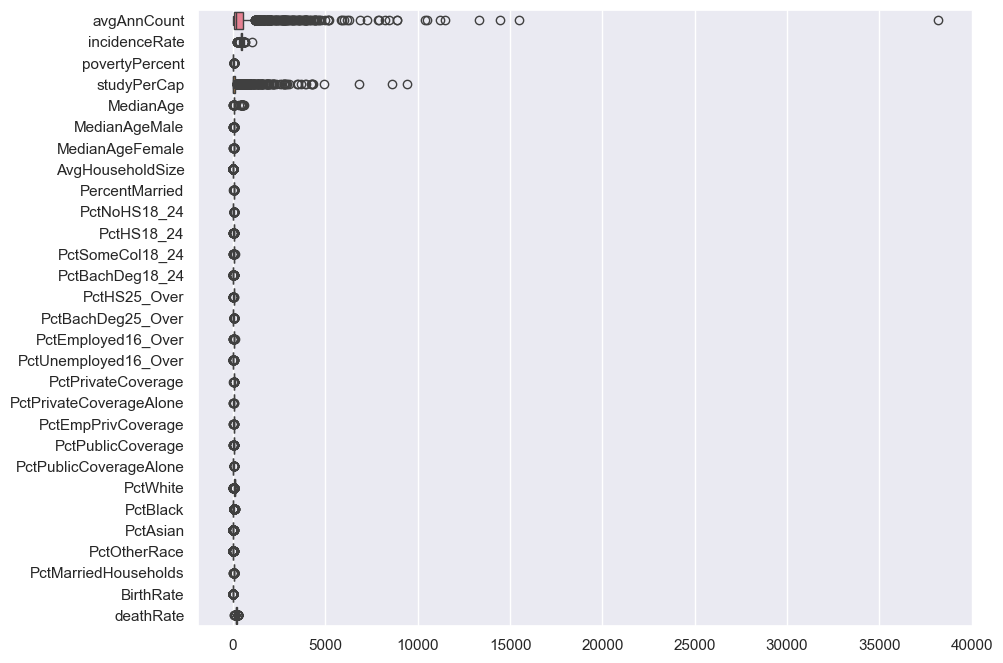

In [9]:
#Visualización de todas las variables float
name_cols_float = df.select_dtypes(include=['float64']).columns
fig=plt.figure(figsize=(10,8))
ax = sns.boxplot(data=df[name_cols_float], orient="h")

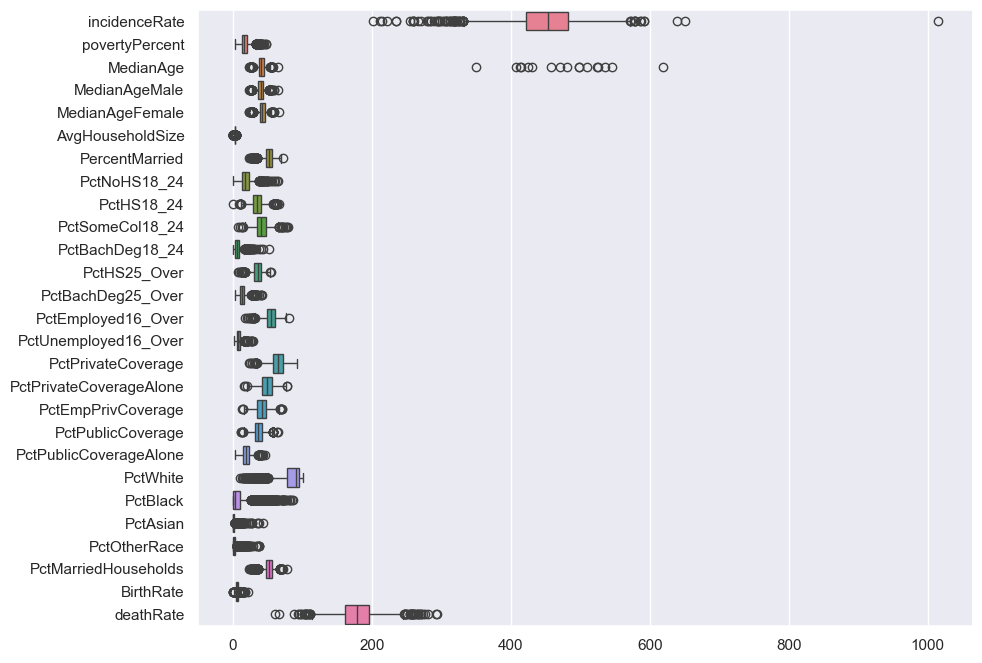

In [10]:
# Visualización de todas las variables float excluyendo las columnas "studyPerCap" y "avgAnnCount" para tener una mejor escala
cols_exclude = ["studyPerCap", "avgAnnCount"]
name_cols_float_filtradas = name_cols_float[~name_cols_float.isin( cols_exclude )]
fig=plt.figure(figsize=(10,8))
ax = sns.boxplot(data=df[name_cols_float_filtradas], orient="h")

In [11]:
# Explorar las variables que no son numéricas
name_cols_non_number = df.select_dtypes(include = ['object']).columns
name_cols_non_number

Index(['binnedInc', 'Geography'], dtype='object')

In [12]:
#Revisar el contenido de las variables que no son numéricas, en este caso son categóricas.
df[name_cols_non_number].describe()

binnedInc                     Geography
count                 2132                          2132
unique                  10                          2132
top     (37413.8, 40362.7]  Gregory County, South Dakota
freq                   223                             1

In [13]:
# Verificamos los 10 valores únicos en la variable 'binnedInc'
pd.value_counts(df['binnedInc'])

C:\Users\JHONATAN RIVERA\AppData\Local\Temp\ipykernel_852\3952523422.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['binnedInc'])


binnedInc
(37413.8, 40362.7]    223
(48021.6, 51046.4]    220
[22640, 34218.1]      219
(51046.4, 54545.6]    216
(54545.6, 61494.5]    215
(42724.4, 45201]      213
(45201, 48021.6]      210
(40362.7, 42724.4]    206
(34218.1, 37413.8]    205
(61494.5, 125635]     205
Name: count, dtype: int64

--------------------------------
### **Análisis de completitud**
--------------------------------

In [14]:
# Cálculo de porcentaje de valores nulos por columna
((df.isnull().sum()/df.shape[0])).sort_values(ascending=False)

PctSomeCol18_24            0.752345
PctPrivateCoverageAlone    0.200750
PctEmployed16_Over         0.053940
PctPublicCoverage          0.000000
PctBachDeg25_Over          0.000000
PctUnemployed16_Over       0.000000
PctPrivateCoverage         0.000000
PctEmpPrivCoverage         0.000000
avgAnnCount                0.000000
PctHS25_Over               0.000000
PctWhite                   0.000000
PctBlack                   0.000000
PctAsian                   0.000000
PctOtherRace               0.000000
PctMarriedHouseholds       0.000000
BirthRate                  0.000000
PctPublicCoverageAlone     0.000000
PctBachDeg18_24            0.000000
avgDeathsPerYear           0.000000
PctHS18_24                 0.000000
PctNoHS18_24               0.000000
PercentMarried             0.000000
AvgHouseholdSize           0.000000
Geography                  0.000000
MedianAgeFemale            0.000000
MedianAgeMale              0.000000
MedianAge                  0.000000
binnedInc                  0

* La columna `PctSomeCol18_24` tiene casi 3/4 de sus registros con valores nulos, por lo tanto su uso no proporciona información valiosa, será necesario removerla en la fase de preparación de datos.
* La columna `PctPrivateCoverageAlone` tiene 20% de los registros en nulo. Es un número significativo pero no mayoritario, podría considerarse remplazar los valores nulos por el promedio.

--------------------------------
### **Análisis de Unicidad**
--------------------------------

Se verifica si hay filas idénticas que representa duplicidad de los datos.

In [15]:
df.duplicated(keep = False).sum()

0

--------------------------------
### **Análisis de Validez**
--------------------------------

In [16]:
#Podemos analizar la validez de las variables que recogen la informacion de la demografia racial del condado. La suma de todas las razas
#deberia dar 100% o cercano (posibles errores menores: redondeo,etc)
df["sumPctRace"]=df["PctAsian"]+df["PctBlack"]+df["PctWhite"]+df["PctOtherRace"]
conteo_fuera_de_rango = ((df['sumPctRace'] < 95) | (df['sumPctRace'] > 105)).sum()
porcentaje_fuera_de_rango=conteo_fuera_de_rango/(df["sumPctRace"].count())
porcentaje_fuera_de_rango

0.13367729831144465

13% de las filas se salen del rango de validez deseado para los porcentajes raciales del condado, podriamos analizar descartar estas variables en la fase de preparación de datos.

In [17]:
df=df.drop("sumPctRace", axis=1)

Ahora podemos analizar la validez de la variable MedianAge para ver si existen valores atípicos que no sean lógicos. Ya sabemos que el valor mínimo de la variable es 23.5, un valor un poco raro pero difinitivamente no es inválido, por lo tanto vamos a analizar que valores son ilógicamente altos, una edad media atípica pero posible podria ser 75 años, veremos los registros mayores a esta edad.

In [18]:
conteo_fuera_de_rango = (df['MedianAge'] > 75).sum()
porcentaje_fuera_de_rango=conteo_fuera_de_rango/(df["MedianAge"].count())
porcentaje_fuera_de_rango

0.00797373358348968

Podemos ver que los valores inválidos no superan el 0.8% de los registros, por lo tanto podriamos decidir remplazarlos con la media para evitar que los outliers afecten el impacto de la variable en el modelo.

__Análisis de outliers__

Utilizaremos el metodo del rango intercuatílico IQR para mirar cuales columnas tienen mayor número de outliers

In [19]:
def cantidad_outliers(columna):
    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites para detectar outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Contar el número de outliers
    outliers = ((columna < limite_inferior) | (columna > limite_superior))
    cantidad_outliers = outliers.sum()

    return cantidad_outliers

# Obtener la cantidad de outliers para cada columna en el DataFrame
cantidad_outliers_por_columna = df.select_dtypes(include=['float64', 'int64']).apply(cantidad_outliers)
cantidad_outliers_por_columna.sort_values(ascending=False)

studyPerCap                366
avgAnnCount                333
popEst2015                 287
PctBlack                   264
avgDeathsPerYear           261
PctAsian                   228
PctOtherRace               210
AvgHouseholdSize           129
PctWhite                   126
BirthRate                  117
medIncome                   86
PctMarriedHouseholds        69
incidenceRate               68
MedianAge                   61
PctBachDeg18_24             61
MedianAgeMale               55
povertyPercent              54
PctBachDeg25_Over           53
deathRate                   50
PctNoHS18_24                47
PercentMarried              47
PctUnemployed16_Over        44
MedianAgeFemale             43
PctHS18_24                  33
PctPublicCoverageAlone      26
PctHS25_Over                22
PctSomeCol18_24             19
PctEmployed16_Over          18
PctPublicCoverage           17
PctPrivateCoverage          16
PctEmpPrivCoverage           9
PctPrivateCoverageAlone      5
dtype: i

__Visualización__

In [20]:
#tomamos las variables numericas para visualizarlas
df_numericas = df.select_dtypes(include=['float64', 'int64'])

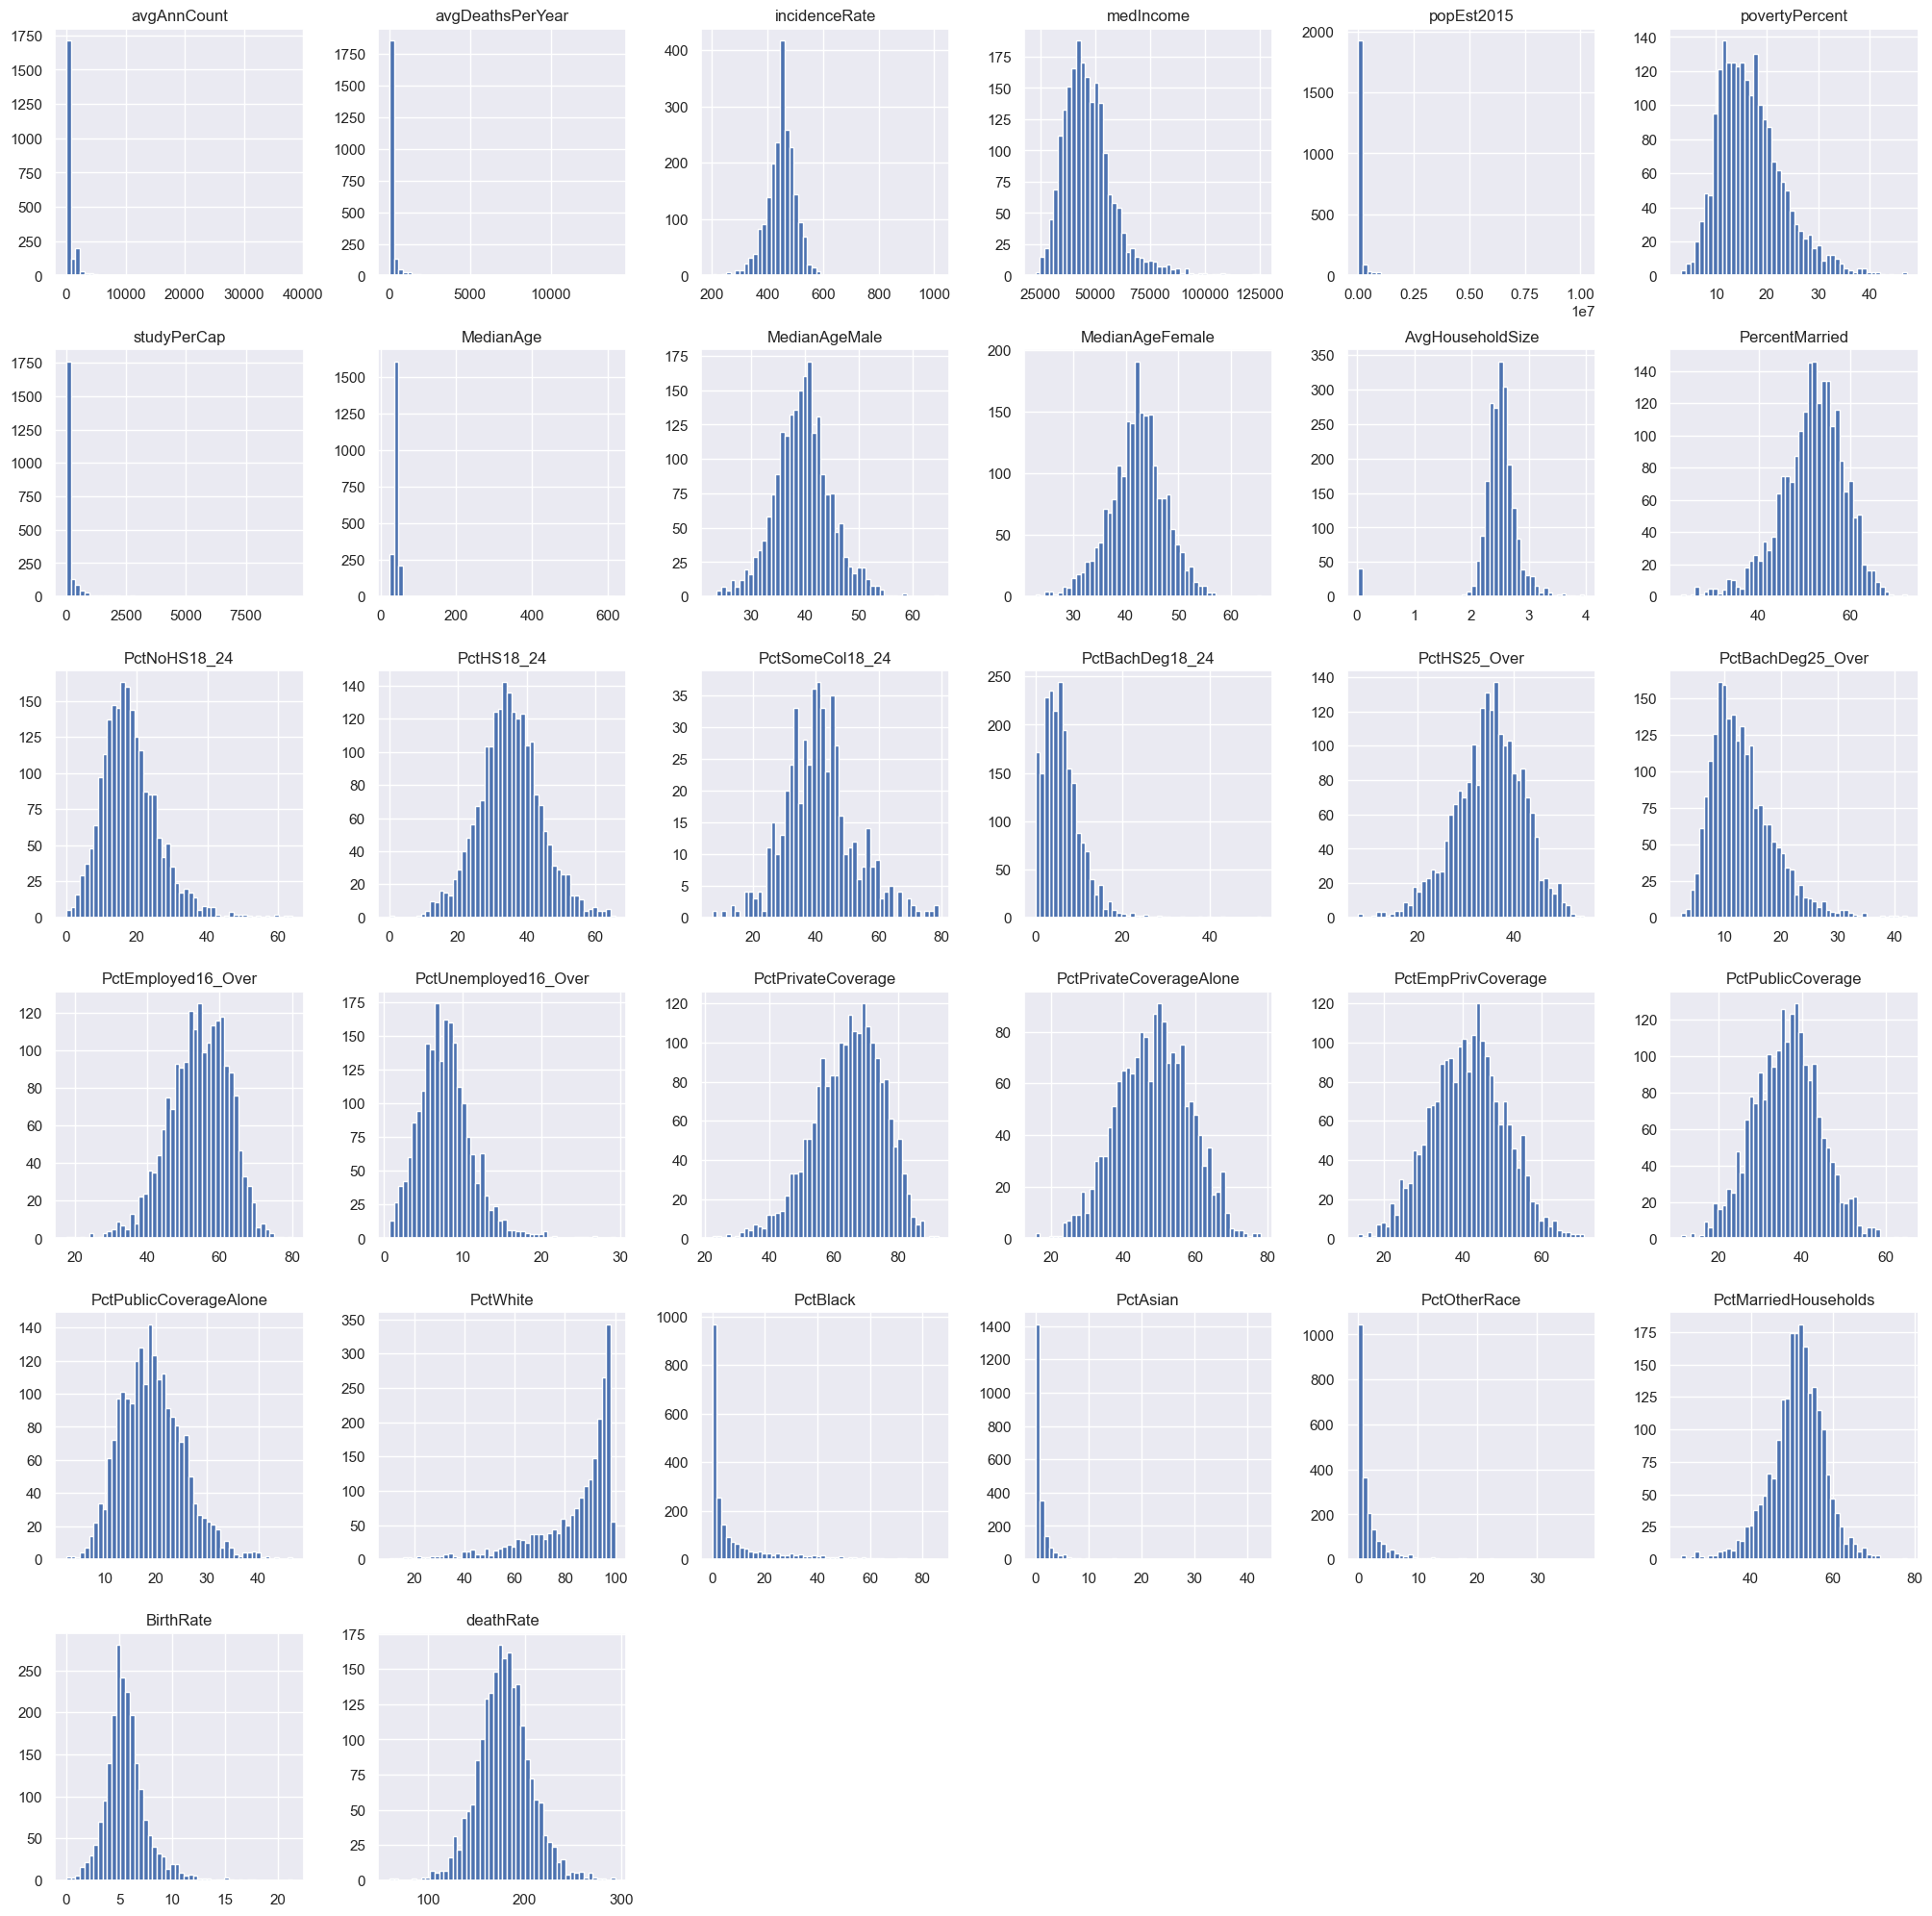

In [21]:
#Creamos un diagrama de distribucion para cada columna numerica
df_numericas.hist(bins=50, figsize=(25, 25))
plt.show()

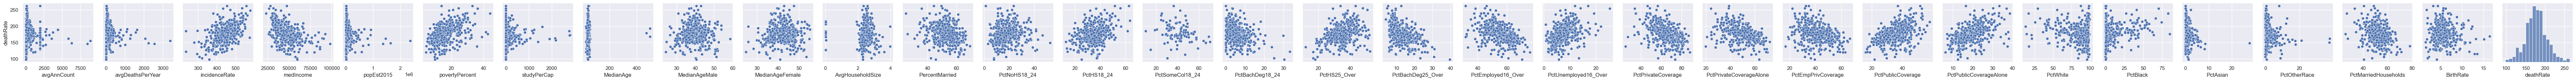

In [22]:
#Procedemos a visualizar la relacion entre las variables y la variable objetivo para validar el modelo posteriormente
sns.pairplot(df_numericas.sample(frac=0.2), y_vars="deathRate", x_vars=df_numericas, kind="scatter")

<Axes: >

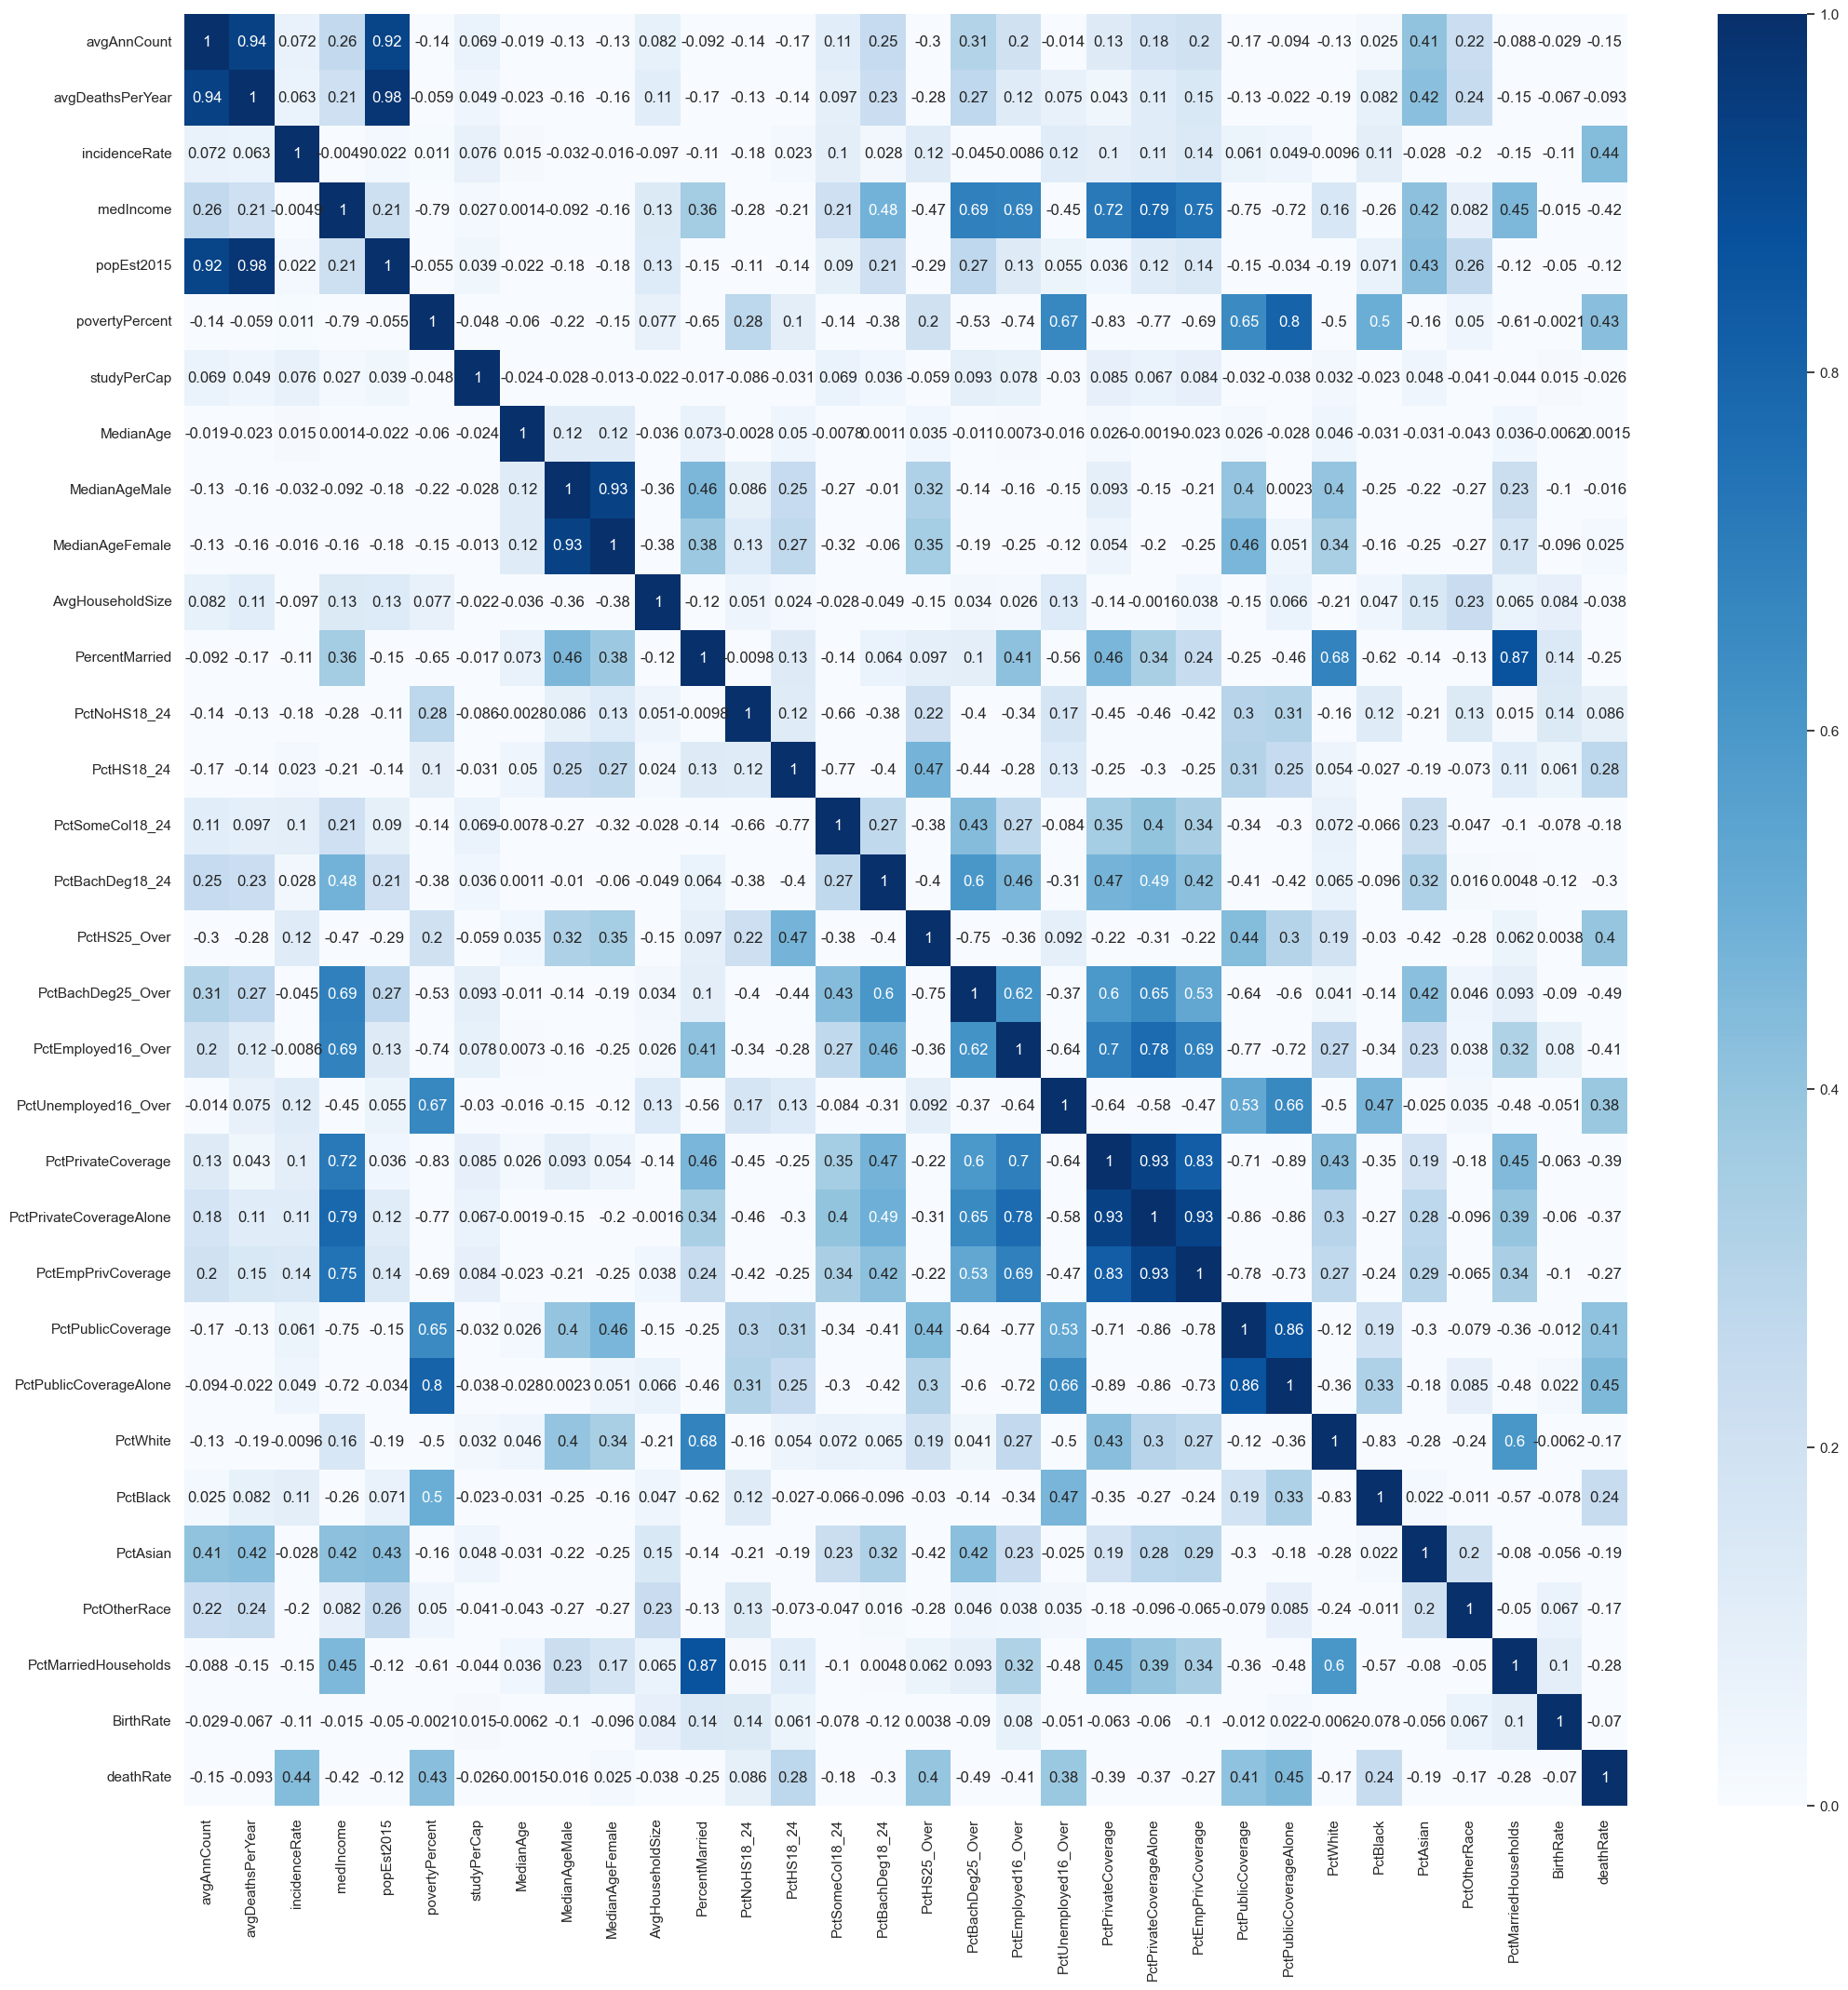

In [23]:
#Podemos mirar las correlaciones entre todas las variables para analizar que variables pueden sacarse
plt.figure(figsize=(25, 25))
sns.heatmap(df_numericas.corr(), cmap="Blues", vmin=0, vmax=1,annot=True)

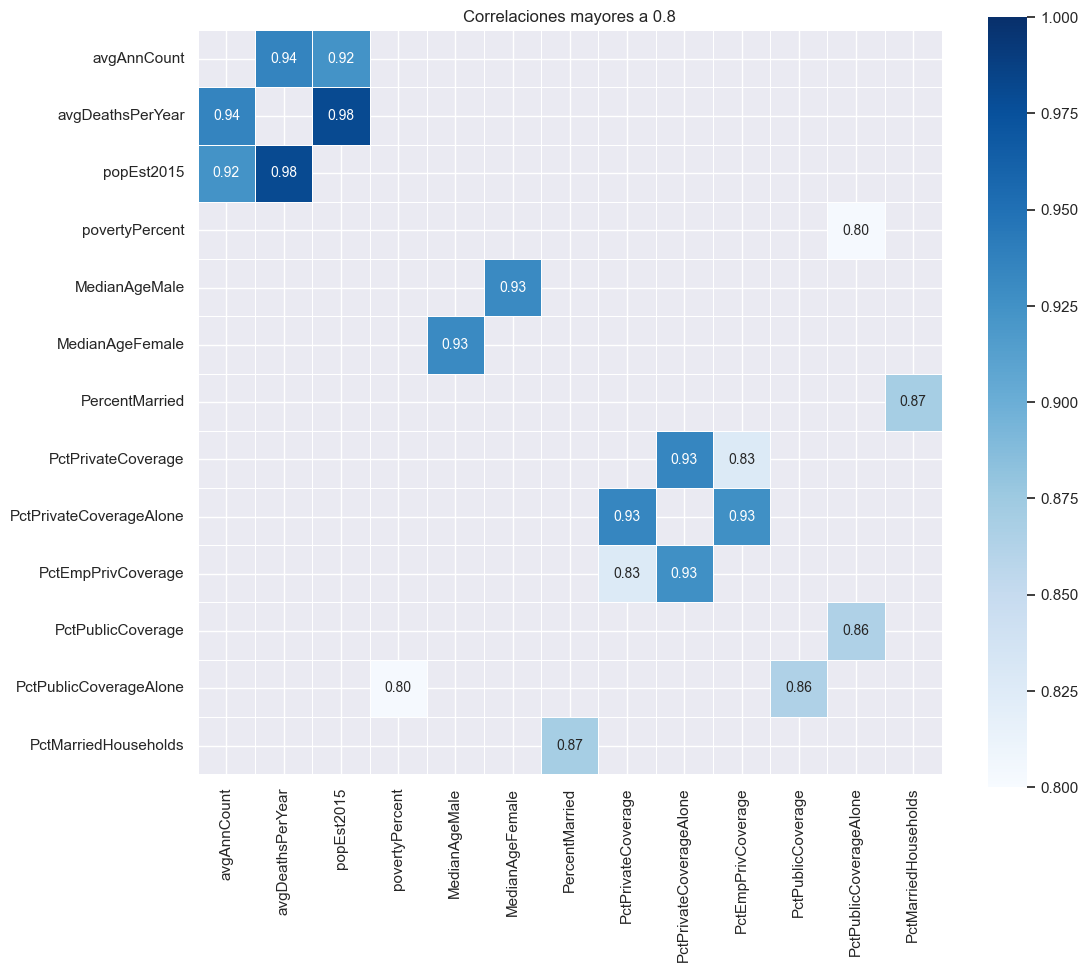

In [24]:
#Gráfica de correlaciones mayores a 0.8.
correlaciones = df_numericas.corr()
correlaciones_filt = correlaciones[(correlaciones > 0.8) & (correlaciones < 1)]
columnas_con_correlaciones = correlaciones_filt.dropna(axis=1, how='all').columns

plt.figure(figsize=(12, 10))
sns.heatmap(correlaciones_filt.loc[columnas_con_correlaciones, columnas_con_correlaciones], 
            annot=True, cmap="Blues", fmt=".2f", annot_kws={"size": 10},
            vmin=0.8, vmax=1, square=True, linewidths=0.5)
plt.title("Correlaciones mayores a 0.8")
plt.show()

__Observaciones:__
1. La variable `avgAnnCount` tiene una correlación alta con `avgDeathsPerYear` (0.94).
2. La variable `avgAnnCount` tiene una correlación alta con `popEst2015` (0.92).
----------------------------

3. La variable `avgDeathsPerYear` tiene una correlación alta con `popEst2015` (0.98). 
----------------------------
4. La variable `povertyPercent` tiene una correlación alta con `PctPublicCoverageAlone` (0.80).
----------------------------
5. La variable `MedianAgeFemale` tiene una correlación alta con `MedianAgeMale` (0.93).
----------------------------
6. La variable `PctMarriedHouseholds` tiene una correlación alta con `PercentMarried` (0.87).
----------------------------
7. La variable `PctPrivateCoverage` tiene una correlación alta con `PctPrivateCoverageAlone` (0.93).
8. La variable `PctPrivateCoverage` tiene una correlación alta con `PctEmpPrivCoverage` (0.83).
----------------------------
9. La variable `PctPrivateCoverageAlone` tiene una correlación alta con `PctEmpPrivCoverage` (0.93).
----------------------------
10. La variable `PctPublicCoverage` tiene una correlación alta con `PctPublicCoverageAlone` (0.86).

--------------------------------
__Definición:__
1. `avgAnnCount`: Número promedio de casos diagnosticados de cáncer reportados anualmente.
2. `avgDeathsPerYear`: Número promedio de muertes por cáncer reportadas anualmente.
3. `popEst2015`: Población del condado.
4. `povertyPercent`: Porcentaje de la población en la pobreza
5. `MedianAgeFemale`: Edad mediana de los residentes de sexo femenino del condado.
6. `MedianAgeMale`: Edad medianana de los residentes de sexo masculino del condado.
7. `PercentMarried`: Porcentaje de residentes del condado que están casados.
8. `PctMarriedHouseholds`: Porcentaje de matrimonios.

--------------------------------
9. `PctPublicCoverageAlone`: Porcentaje de residentes del condado con cobertura de salud cubierta por el gobierno.
10. `PctPublicCoverage`: Porcentaje de residentes del condado con cobertura de salud privada cubierta por el empelador.
11. `PctPrivateCoverage`: Porcentaje de residentes del condado con cobertura de salud privada.
12. `PctPrivateCoverageAlone`: Porcentaje de residentes del condado con covertura de salud únicamente (sin financiación pública).
13. `PctEmpPrivCoverage`:Porcentaje de residentes del condado con cobertura de salud privada cubierta por el empelador.








__Conclusiones:__

Podemos ver que para varios conjuntos de variables se presentan altas correlaciones. Podríamos considerar remover variables que se ven representadas en otras variables, debido a su alta correlación, esto nos permitiria simplificar el modelo sin perder información adicional importante.

* La columna popEst2015 (población estimada del condado), está altamente correlacionada con acgAnnCount(cantidad de casos de cáncer dignosticados en promedio cada año) y con avgDeathPerYear (número promedio de muertes por año). Esto tiene una lógica empírica debido a que a mayor población mayor nuúero de personas con cáncer, y una mayor cantidad de muertos cada año, dadas codiciones relativamente iguales. Podríamos decidir quedarnos con sólo la columna de acgAnnCount, debido a la que es la que parece mantener una relación más directa con el objetivo de negocio. 
* Las variables MedianAgeMale y MedianAgeFemale, tienen una correlación del 93%, podemos asumir que para la mayoría de condados, la edad media es igual/similar para ambos sexos, por lo tanto podemos elimnar una de estas columnas sin perder información. Podríamos quedarnos con la edad media femenina, debido a que tiene mayor correlación con la variable objetivo.
* Las columnas PercentMarried y PctMarriedHouseHolds están altamente correlacionadas tanto de manera matemática como empírica, podemos quedarnos con una de estas para entrenar al modelo, podríamos quedarnos específicamente con PercentMarried porque describe directamente a los individuos en lugar de grupos de personas, esto tiene una mayor relación con las otras columnas.
* PctPrivateCoverage, PctPrivateCoverageAlone y PctEmpPrivCoverage, se encuentran altamente correlacionadas entre ellas, podríamos quedarnos con solo una de estas sin perder información valiosa. Debido a que PctPrivateCoverageAlone presenta un gran número de datos nulos, no sera elegida. Podríamos quedarnos con PctPrivateCoverage sobre PctEmpPrivCoverage, debido a que la primera abarca el fenomeno de la segunda.
* PctPublicCoverage y PctPublicCoverageAlone también están altamente correlacionadas. Debido a que PctPublicCoverageAlone también se encuentra altamente correlacionada con povertyPercent, podríamos eliminarla sin una repercusión significativa.

--------------------------------
# **2. Preparación de datos**
--------------------------------

__Transformar variable binnedInc a númerica__


* Para transformar la variable `binnedInc` de su formato de objeto, en forma de un rango correspondiente al decil del ingreso medio en el que se encuentra el condado, decidimos rankear los deciles del más alto al más bajo, asignarles un valor del 1 al 10, siendo 1 el decil más bajo y 10 el decil más alto. 
* Esta transformación resulta útil debido a que además de transformar la variable a un valor númerico procesable por el algoritmo de regresión, toma valores en una escala simple. 

In [25]:
df['binnedInc'] = df['binnedInc'].apply(lambda x: float(x.split(',')[0][1:]))
valores_unicos = sorted(df['binnedInc'].unique())
mapeo_rango = {valor: rango+1 for rango, valor in enumerate(valores_unicos)}
df['binnedInc'] = df['binnedInc'].map(mapeo_rango)
df["binnedInc"]

0        2
1        7
2        9
3        1
4        3
        ..
2127     1
2128    10
2129    10
2130     9
2131     9
Name: binnedInc, Length: 2132, dtype: int64

Ahora con la introducción de esta nueva variable, podemos validar que no tenga una correlación alta con ninguna otra existente, en caso de tenerla se removara alguna de estas variables

In [26]:
correlaciones = df_numericas.corrwith(df["binnedInc"])
correlaciones.sort_values(ascending=False)


medIncome                  0.896523
PctPrivateCoverageAlone    0.809789
PctPrivateCoverage         0.766058
PctEmpPrivCoverage         0.750864
PctEmployed16_Over         0.738625
PctBachDeg25_Over          0.642918
PctMarriedHouseholds       0.455030
PctBachDeg18_24            0.422202
PercentMarried             0.394470
PctAsian                   0.301285
avgAnnCount                0.252053
PctSomeCol18_24            0.246687
PctWhite                   0.243485
avgDeathsPerYear           0.194999
popEst2015                 0.194930
AvgHouseholdSize           0.081772
PctOtherRace               0.070884
studyPerCap                0.052444
BirthRate                  0.017088
incidenceRate              0.012593
MedianAge                  0.009642
MedianAgeMale             -0.084847
MedianAgeFemale           -0.146873
PctHS18_24                -0.199433
PctNoHS18_24              -0.294827
PctBlack                  -0.321578
PctHS25_Over              -0.404615
deathRate                 -0

Las variables que presentan una correlación absoluta alta (>0.8) con `binnedInc` son `medIncome`, `PctPrivateCoverageAlone` y `povertyPercent`. La variable `PctPrivateCoverageAlone` ya se estimaba ser removida por su correlación alta con otras variables, sin embargo ahora decidiremos remover tambien `medIncome` y `povertyPercent` para quedar con binnedInc.

__Selección de variables__

* Vamos a quitar las columnas/variables que poseen una alta correlación con otras variables, estas fueron definidas en la fase de entendimiento de datos.
* Ademas removeremos la variable Geography, teniendo en cuenta que primero es una variable categórica que no aporta a la regresión lineal, y que además solo sirve como identificador de las filas.
* La variable PctSomeCol18_24 tiene casi 3/4 de sus filas en nulo, para poder utilizar la columna seria necesario remplazar los valores nulos por la media, sin embargo esto sesgaria de manera considerada la columna hacia el valor medio, dañando su posible utilidad en la regresión, por lo tanto se decidió removerla enteramente.

In [27]:
nonecesarias = ["Geography","popEst2015","avgDeathsPerYear","MedianAgeMale","PctMarriedHouseholds","PctPrivateCoverageAlone","PctEmpPrivCoverage","PctPublicCoverage","PctSomeCol18_24","medIncome","povertyPercent","deathRate"]
df_seleccion1=df.drop(nonecesarias, axis=1)

__Manejo de datos nulos__

In [28]:
#De las variables seleccionadas solo PctEmployed16_Over presenta datos nulos. Estos representan un 4% de los registros
#Al tratarse de una cantidad considerablemente baja, vale la pena utilizar la columna, remplazado los valores nulos por el valor medio
#Utilizar el valor medio nos permite mantener la mayoria de la información de la columna relativamente igual

mediana = df_seleccion1["PctEmployed16_Over"].median()  # option 3
df_seleccion1.fillna({"PctEmployed16_Over": mediana}, inplace=True)

In [29]:
#Confirmamos que el dataframe quede sin valores nulos
((df_seleccion1.isnull().sum()/df_seleccion1.shape[0])).sort_values(ascending=False)

avgAnnCount               0.0
incidenceRate             0.0
PctOtherRace              0.0
PctAsian                  0.0
PctBlack                  0.0
PctWhite                  0.0
PctPublicCoverageAlone    0.0
PctPrivateCoverage        0.0
PctUnemployed16_Over      0.0
PctEmployed16_Over        0.0
PctBachDeg25_Over         0.0
PctHS25_Over              0.0
PctBachDeg18_24           0.0
PctHS18_24                0.0
PctNoHS18_24              0.0
PercentMarried            0.0
AvgHouseholdSize          0.0
MedianAgeFemale           0.0
MedianAge                 0.0
binnedInc                 0.0
studyPerCap               0.0
BirthRate                 0.0
dtype: float64

__Remover outliers__

In [30]:
def remover_outliers(columna):
    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites para detectar outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Reemplazar outliers por la mediana
    columna_sin_outliers = columna.where((columna >= limite_inferior) & (columna <= limite_superior), columna.median())

    return columna_sin_outliers

# Aplicar la función para remover outliers en cada columna del DataFrame
df_sin_outliers = df_seleccion1.apply(remover_outliers)

__Definir datos de entrenamiento y validación__

In [31]:

X_train, X_test, y_train, y_test = train_test_split(df_seleccion1, df["deathRate"], test_size=0.3, random_state=1)

print(len(X_train))
print(len(X_test))

1492
640


__Normalizar los datos__

Debido a que hay variables con rangos de valores muy altos, a comparación a otras variables con rangos de valores significativamente menores, para que el modelo no le dé mayor significancia a las variables con rangos de valores altos, normalizamos aplicando una escala equitativa para todas las variables

In [32]:
scaler = StandardScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n= scaler.transform(X_test)
X_train

avgAnnCount  incidenceRate  studyPerCap  binnedInc  MedianAge  \
288         384.0          427.6     0.000000          9       46.3   
1855        316.0          420.9     0.000000          7       40.9   
1554        223.0          312.7     0.000000          9       42.6   
1808        142.0          453.7     0.000000          3       41.8   
408         160.0          415.9     0.000000          6       42.3   
...           ...            ...          ...        ...        ...   
960         828.0          477.1   264.914697          8       39.9   
905         590.0          461.3   187.297803          9       38.7   
1096         16.0          409.2     0.000000          8       29.7   
235         105.0          440.8     0.000000          2       39.0   
1061        173.0          445.6     0.000000          4       39.5   

      MedianAgeFemale  AvgHouseholdSize  PercentMarried  PctNoHS18_24  \
288              48.1              2.47            57.0          16.9   
1855             43.3              2.45            53.8          17.2   
1554             43.1              2.56            59.5          18.6   
1808             42.5              2.57            51.5           9.1   
408              42.9              2.54            58.6          25.6   
...               ...               ...             ...           ...   
960              41.1              2.69            53.7          18.3   
905              39.3              2.66            55.6          16.4   
1096             28.5              3.56            40.7          21.6   
235              41.6              2.66            40.8          21.1   
1061             41.0              2.50            49.1          22.8   

      PctHS18_24  ...  PctBachDeg25_Over  PctEmployed16_Over  \
288         34.4  ...               19.1                53.9   
1855        37.1  ...               15.3                64.9   
1554        41.4  ...               12.4                57.1   
1808        39.1  ...                9.3                48.2   
408         40.4  ...               13.5                57.8   
...          ...  ...                ...                 ...   
960         35.0  ...               17.7                58.6   
905         31.2  ...               15.4                59.6   
1096        51.9  ...               10.9                51.9   
235         40.4  ...                7.0                47.2   
1061        43.7  ...               10.9                50.9   

      PctUnemployed16_Over  PctPrivateCoverage  PctPublicCoverageAlone  \
288                    9.0                66.5                    16.7   
1855                   5.5                71.9                    17.2   
1554                   7.9                73.7                    16.5   
1808                   8.0                59.7                    23.3   
408                    4.0                63.6                    16.5   
...                    ...                 ...                     ...   
960                    9.8                69.1                    16.1   
905                    5.3                70.0                    17.1   
1096                  12.5                36.8                    30.2   
235                   11.9                53.7                    25.9   
1061                  11.5                59.4                    25.8   

       PctWhite   PctBlack  PctAsian  PctOtherRace  BirthRate  
288   78.990375  12.277736  1.389569      4.478652   5.818293  
1855  95.251778   0.534989  0.671514      0.612776   4.992504  
1554  96.370061   0.486922  0.476778      0.933268   6.143949  
1808  97.414495   1.099349  0.236156      0.052932   5.300939  
408   97.291852   0.501998  0.485485      0.677037   7.467205  
...         ...        ...       ...           ...        ...  
960   81.454691  12.349000  2.260914      1.977997   4.754928  
905   90.413149   5.832228  0.954908      0.523574   5.129672  
1096  18.718618   0.341434  1.446074      

--------------------------------
# **3. Modelado**
--------------------------------

Utilizaremos la implementacion de regresión lineal simple dado que el objetivo de negocio está enfocado en el análisis del modelo resultante.

In [33]:
regression = LinearRegression()
regression.fit(X_train_n, y_train)

LinearRegression()

--------------------------------
# **4. Evaluación Cuantitativa**
--------------------------------

**Mean Absolute Error (MAE)**

$$ MAE = {1 \over n}{\sum_{i=1}^n {|y_{i} - y_{i}'|} } $$

In [34]:
print("Train:", mean_absolute_error(y_train, regression.predict(X_train_n)))
print("Test:", mean_absolute_error(y_test, regression.predict(X_test_n)))

Train: 14.336436689692393
Test: 14.48984794760275


**Root Mean Squeared Error (RMSE)**

$$ RMSE = {1 \over n}{\sum_{i=1}^n {(y_{i} - y_{i}')^2} } $$

In [35]:
print("Train:", np.sqrt(mean_squared_error(y_train, regression.predict(X_train_n))))
print("Test:", np.sqrt(mean_squared_error(y_test, regression.predict(X_test_n))))

Train: 19.676699236621673
Test: 19.19907859614786


**Coeficiente de determinación R<sup>2</sup>**

In [36]:
print("Train: ", r2_score(y_train.values, regression.predict(X_train_n)))
print("Test: ", r2_score(y_test.values, regression.predict(X_test_n)))

Train:  0.48958078413233863
Test:  0.49800532569922473


* Lo primero que podemos interpretar de los valores de los errores y R2 es que el modelo no se encuentra sobre ajustado, evidencia de esto es el hecho de que los valores de entrenamiento y testeo no difieren significativamente.
* Para darle una interpretación a los valores obtenidos de los errores (RMSE y MAE) podemos compararlos con la desviacion estandar de la variable objetivo.
* Previamente en la fase de entendimiento de datos obtuvimos una desviación estándar para `deathRate` (variable objetivo) de 27.416156
* Podemos ver que tanto el MAE como el RMSE tienen valores considerablemente menores (48% menor y 29% menor respectivamente), esto quiere decir que tenemos buenas medidas de error para el modelo, dado que esto indica que el modelo tiene una capacidad de predicción que, en promedio, es mejor que la simple predicción de la media de los datos observados. En otras palabras, el modelo proporciona predicciones que son, en promedio, más cercanas a los valores reales que el promedio de estos últimos. 
* Comparando con otros modelos de la misma naturaleza del realizado, entendemos que 0.5 es un valor considerablemente bueno para la metrica de R2

__Análisis del error__

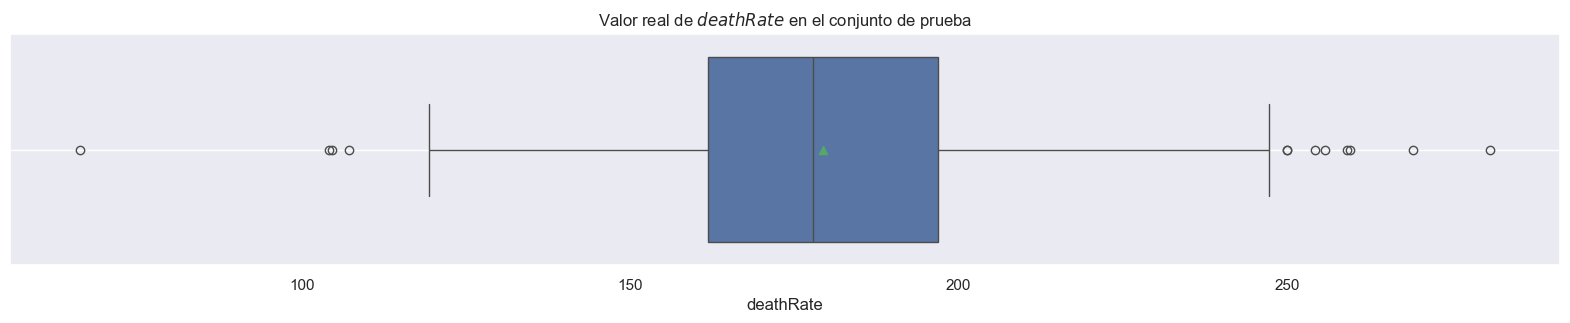

In [37]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=y_test, showmeans=True, orient="h")
plt.title("Valor real de $\t{deathRate}$ en el conjunto de prueba")
plt.grid()
plt.show()

Podemos ver que las muertes ocasionadas por cáncer por cada 100.000 habitantes en un condado toman valores mayoritariemente entre 125 y 250. Esto sera útil para compararlo con el error promedio de los datos estimados. 

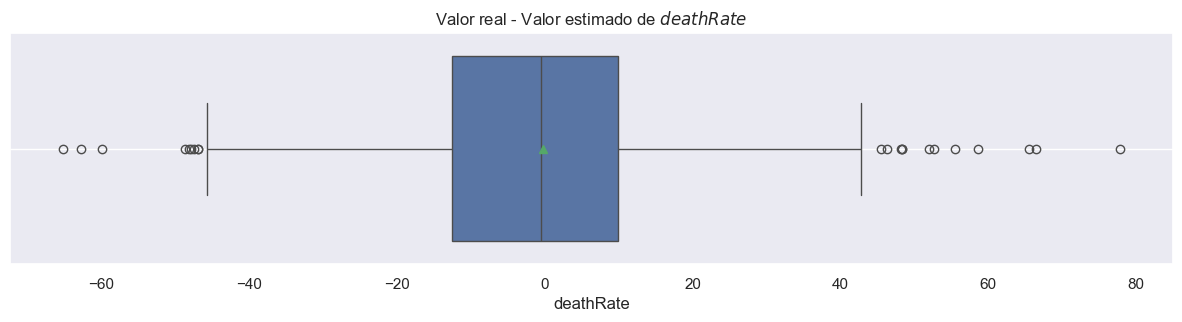

In [38]:
plt.figure(figsize = (15, 3))
sns.boxplot(x = (y_test - regression.predict(X_test_n)), showmeans = True, orient = 'h')
plt.title('Valor real - Valor estimado de $\t{deathRate}$')
plt.grid()
plt.show()

Con esta gráfica continuamos confirmando que el modelo tiene un buen ajuste y que los errores de los datos estimados se encuentran en un buen rango. La medida de error media es aproximadamente 0, lo que nos dice que el  el valor medio estimado es muy cercano al valor observable (real). Además los valores no atípicos de los errores se encuentran en el rango de -40 a 40, con la mayoría de los errores ubicándose entre -10 y 10, de nuevo esto es una prueba mas que confirma el buen ajuste del modelo

## **Conclusiones generales**

En vista de los resultados del análisis cuantitativo, podemos recomendar el uso del modelo para la OMS. Las estimaciones presentan metricas de error muy buenas que superan estimaciones simples que se puedan hacer a partir de los valores observados de la cantidad de muertes por cáncer por cada 100.000 habitantes y la desviación estándar de estos. Un error medio de 0 y una distribución de los errores concentrada en +- 10, además de la poca varianza entre las evaluaciones de los datos de prueba con respecto a los de entrenamiento, nos indican que es probable que para cualquier conjunto de datos, se vaya a estimar la metrica de la variable objetivo de manera muy cercana a la realidad.

--------------------------------
# **5. Evaluación Cualitativa**
--------------------------------

__Interpretación de los coeficientes y del intercepto__

In [39]:
pd.DataFrame({'columns': df_seleccion1.columns, 'coef': regression.coef_})

columns       coef
0              avgAnnCount  -0.939338
1            incidenceRate  11.083272
2              studyPerCap  -0.170250
3                binnedInc  -2.605856
4                MedianAge   0.277398
5          MedianAgeFemale  -2.282259
6         AvgHouseholdSize  -0.088757
7           PercentMarried   1.050551
8             PctNoHS18_24  -0.881307
9               PctHS18_24   2.653314
10         PctBachDeg18_24   0.495392
11            PctHS25_Over   1.440324
12       PctBachDeg25_Over  -6.753924
13      PctEmployed16_Over  -0.173853
14    PctUnemployed16_Over   1.133406
15      PctPrivateCoverage  -3.197761
16  PctPublicCoverageAlone   1.740780
17                PctWhite  -2.014432
18                PctBlack   0.264539
19                PctAsian   0.703421
20            PctOtherRace  -2.605438
21               BirthRate  -1.903075

In [40]:
regression.intercept_

178.87426273458448

In [41]:
#dividimos los features en varias partes para poder observar bien las graficas

features=np.array_split(df_seleccion1.columns, 4)
f1= features[0]
f2= features[1]
f3= features[2]
f4= features[3]


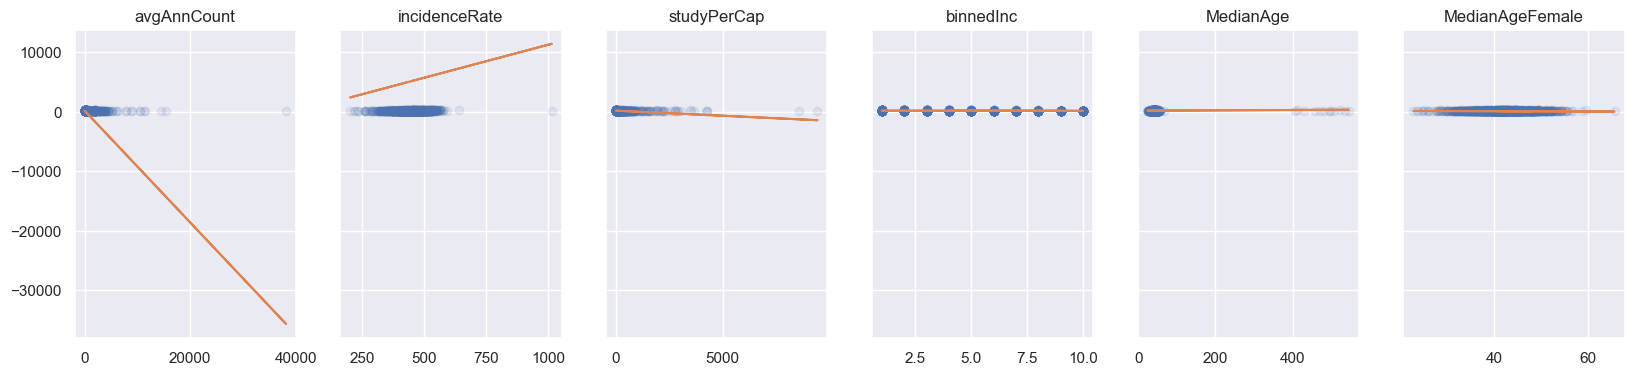

In [42]:
f, axs = plt.subplots(1, len(f1), sharey=True, figsize=(20, 4))

for i in range(len(f1)):
    col = f1[i]
    x = X_train[col]
    m = regression.coef_[i]
    b = regression.intercept_

    axs[i].plot(x, y_train, "o", alpha=0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

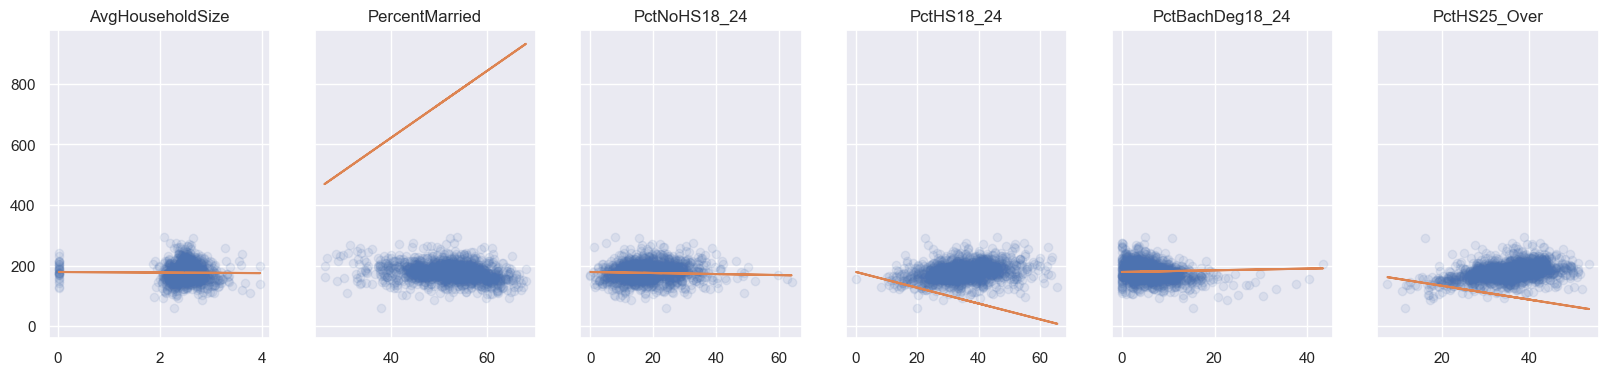

In [43]:
f, axs = plt.subplots(1, len(f2), sharey=True, figsize=(20, 4))

for i in range(len(f2)):
    col = f2[i]
    x = X_train[col]
    m = regression.coef_[i]
    b = regression.intercept_

    axs[i].plot(x, y_train, "o", alpha=0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

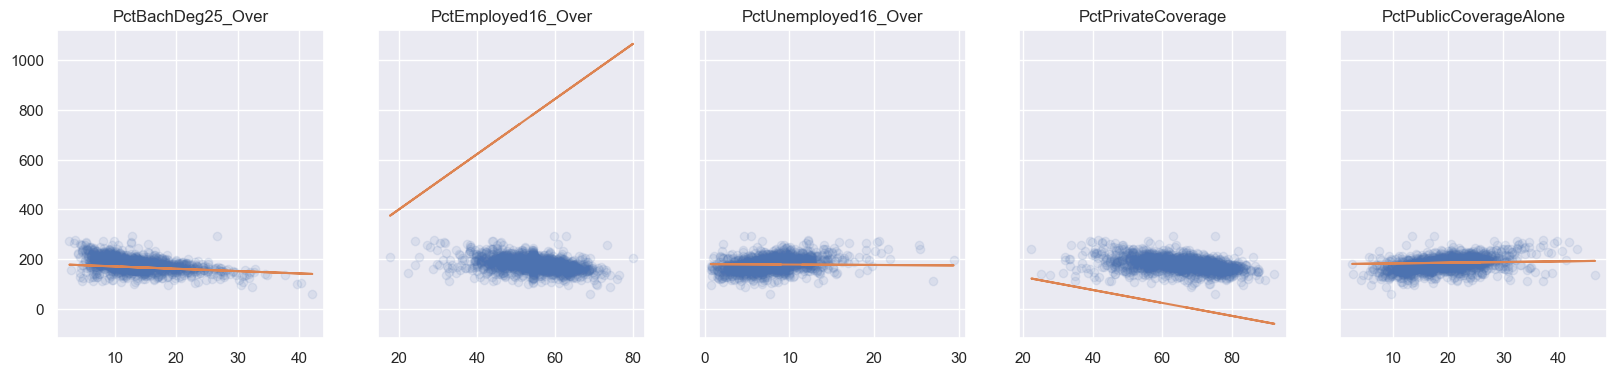

In [44]:
f, axs = plt.subplots(1, len(f3), sharey=True, figsize=(20, 4))

for i in range(len(f3)):
    col = f3[i]
    x = X_train[col]
    m = regression.coef_[i]
    b = regression.intercept_

    axs[i].plot(x, y_train, "o", alpha=0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

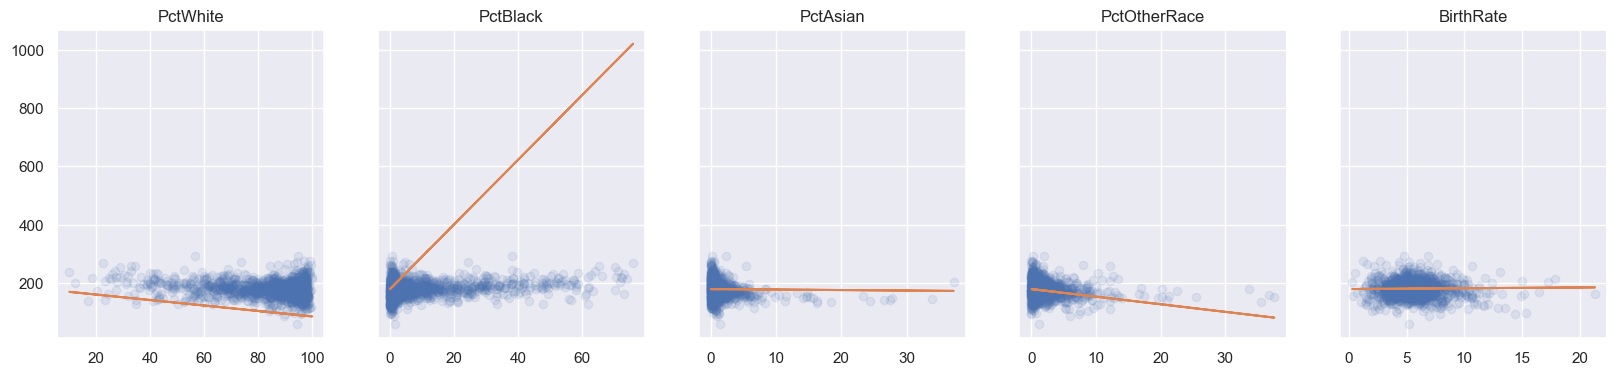

In [45]:
f, axs = plt.subplots(1, len(f4), sharey=True, figsize=(20, 4))

for i in range(len(f4)):
    col = f4[i]
    x = X_train[col]
    m = regression.coef_[i]
    b = regression.intercept_

    axs[i].plot(x, y_train, "o", alpha=0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

In [46]:
#### sacar pvalues
mod = sm.OLS(y_train,X_train_n)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
p_values

x1     0.862697
x2     0.034094
x3     0.971560
x4     0.776925
x5     0.953458
x6     0.737046
x7     0.986592
x8     0.898243
x9     0.883951
x10    0.653246
x11    0.938248
x12    0.868228
x13    0.521593
x14    0.983702
x15    0.880131
x16    0.821035
x17    0.884045
x18    0.872442
x19    0.980385
x20    0.910696
x21    0.650951
x22    0.705004
Name: P>|t|, dtype: float64

De los resultados de esta fase podemos interpretar lo siguiente:

* En un inicio las variables que parecen afectar en mayor medida a la variable objetivo `deathRate` son `incidenceRate`, `PctBachDeg25_Over`, `PctPrivateCoverage`, `PctPrivateCoverage` y `binnedInc`. Todas provocan un razón de cambio absoluta mayor a 3 en la variable objetivo, con la mayor de esta siendo `incidenceRate` con una razón de cambio aproximada de 11. En un inicio podríamos pensar que estas son la variables más significativas para el modelo.
* Obtuvimos el pvalue de cada variable para intentar confirmar su significancia dentro del modelo. Sin embargo, la única variable que logra refutar la hipótesis nula de su insignificancia del modelo con un intervalo de confianza del 95% es `incidenceRate`. Si bien, esto no quiere decir que el resto de variables sea insignificante, no tenemos suficiente información para provar su significancia en el modelo.
* El intercepto de los coeficientes es de 178.87, esto quiere decir que si todas las variables tomaran un valor de 0, la predicción de la variable objetivo arrojaría este valor. Esto puede interpretarse como una valor base/mínimo para la cantidad de muertes ocasionadas por cáncer por cada 100.000 que puede llegar a tener cualquier condado sin importar la varianza de sus variables.

## **Validacion de supuestos**

__Colinealidad__

Vamos a validar que ninguna de las variables utilizadas para el modelo tengan una colinealidad alta.

<Axes: >

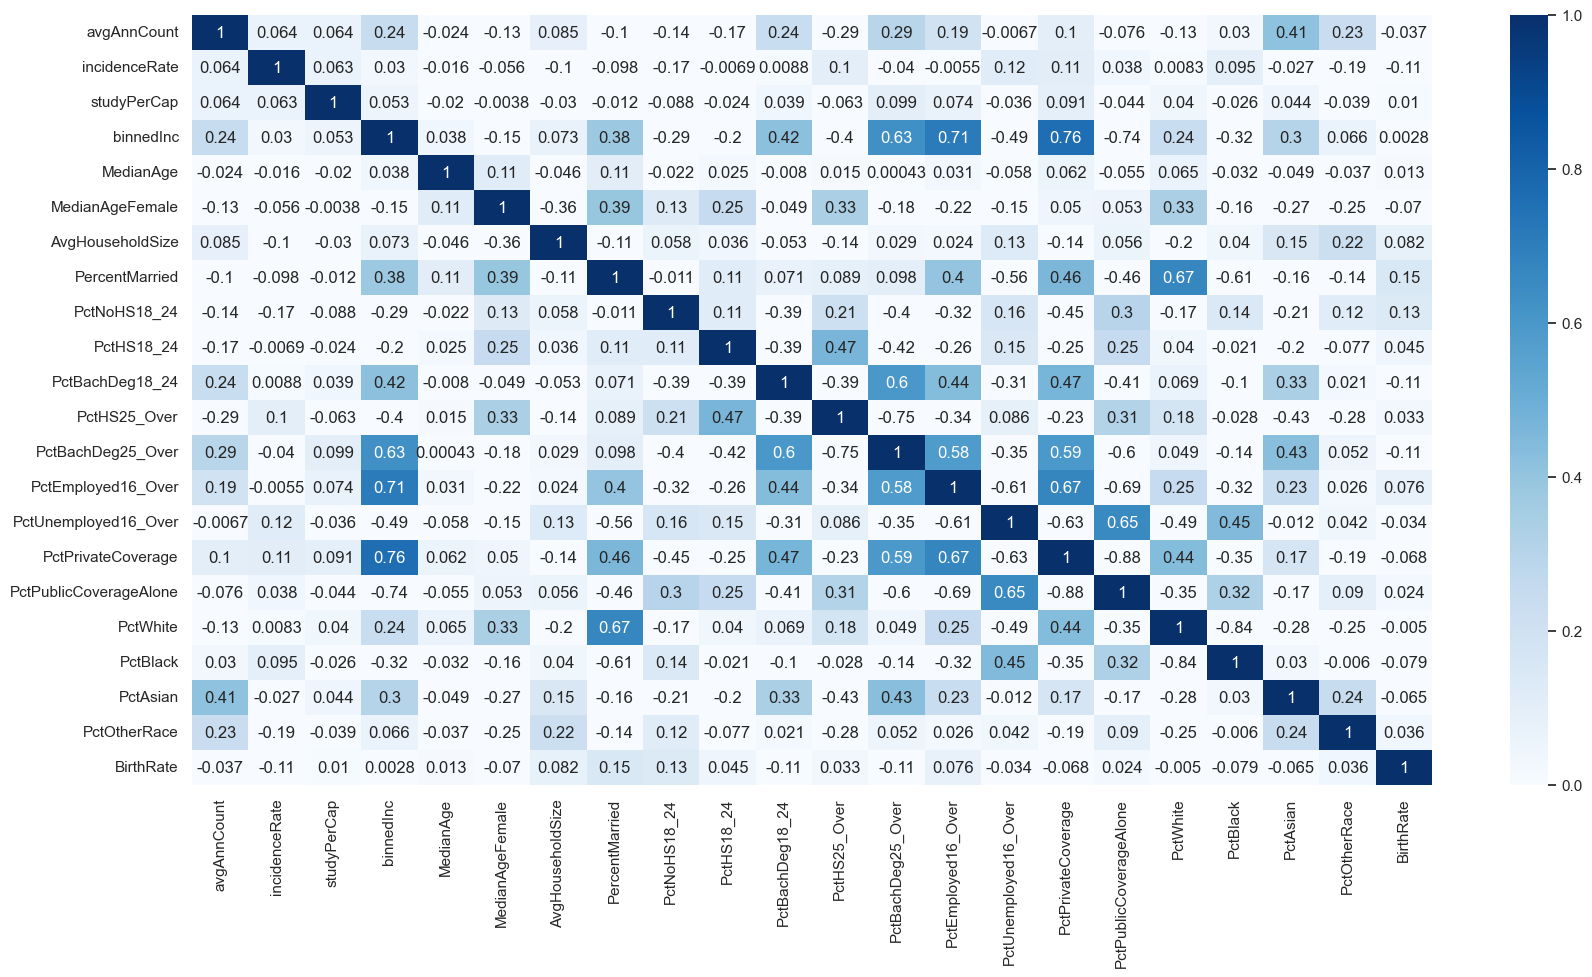

In [47]:
plt.figure(figsize=(20, 10))
sns.heatmap(X_train.corr(), cmap="Blues", vmin=0, vmax=1,annot=True)

Observamos que ninguna variable presenta colinealidad alta (>0.8) con ninguna otra variable.

#### Linealidad

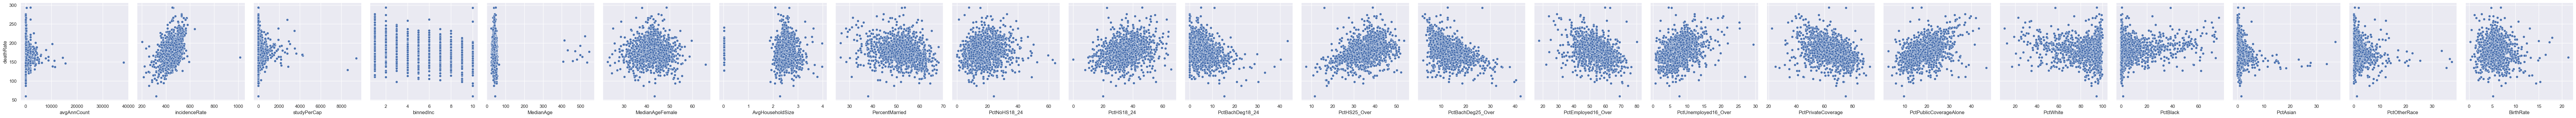

In [48]:
sns.pairplot(pd.concat([X_train, y_train], axis=1), height=4, y_vars="deathRate", x_vars=df_seleccion1.columns, kind="scatter")

Podemos observar que existen varias variables que no poseen una relación lineal con la variable objetivo, aquellas que si parecen tener esta relación son las siguientes:

`incidenceRate`, `PctNoHS18_24`,`PctHS18_24`,`PctHS25_over`,`PctBachDeg25_Over`, `PctEmployed16_Over`, `PctUnemployed16_Over`, `PctPrivateCoverage`, `PctPublicCoverageAlone`,`PctBlack`

Podemos quedarnos solo con estas variables en el modelo y evaluar su nuevo estado.

__Creación de pipeline para nuevo modelo__

In [49]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FunctionTransformer
from OutlierReplacer import OutlierReplacer


features = ["incidenceRate", "PctNoHS18_24","PctHS18_24","PctHS25_Over","PctBachDeg25_Over","PctEmployed16_Over","PctUnemployed16_Over", "PctPrivateCoverage","PctPublicCoverageAlone","PctBlack"]


pipeline = Pipeline([
    ('selector', ColumnTransformer([('selected_columns', 'passthrough', features)])),
    ('outlier_replacer', OutlierReplacer()),  
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler()),  
    ('regressor', LinearRegression())  
])


Ahora pasamos los datos iniciales por el pipeline para crear el nuevo modelo

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df, df["deathRate"], test_size=0.3, random_state=1)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('selector',
                 ColumnTransformer(transformers=[('selected_columns',
                                                  'passthrough',
                                                  ['incidenceRate',
                                                   'PctNoHS18_24', 'PctHS18_24',
                                                   'PctHS25_Over',
                                                   'PctBachDeg25_Over',
                                                   'PctEmployed16_Over',
                                                   'PctUnemployed16_Over',
                                                   'PctPrivateCoverage',
                                                   'PctPublicCoverageAlone',
                                                   'PctBlack'])])),
                ('outlier_replacer', OutlierReplacer()),
                ('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

Ahora vamos a validar el nuevo modelo

In [51]:
mae_train=mean_absolute_error(y_train, pipeline.predict(X_train))
mae_test =mean_absolute_error(y_test, pipeline.predict(X_test))
print("Train:", mae_train )
print("Test:",mae_test )

Train: 14.709172988474595
Test: 14.475497938878666


In [52]:
rmse_train=np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train)))
rmse_test=np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test)))
print("Train:", rmse_train)
print("Test:", rmse_test)

Train: 19.86635824389118
Test: 19.355093381820893


In [54]:
r2_train=r2_score(y_train.values, pipeline.predict(X_train))
r2_test=r2_score(y_test.values, pipeline.predict(X_test))
print("Train: ", r2_train)
print("Test: ", r2_test)

Train:  0.4796937452903687
Test:  0.4898135985982176


In [65]:
coeficientes= pd.DataFrame({'columns': df[features].columns, 'coef': pipeline["regressor"].coef_})
coeficientes

columns       coef
0           incidenceRate  12.028595
1            PctNoHS18_24  -1.600447
2              PctHS18_24   1.863773
3            PctHS25_Over   2.622615
4       PctBachDeg25_Over  -5.570484
5      PctEmployed16_Over  -1.064171
6    PctUnemployed16_Over   1.185694
7      PctPrivateCoverage  -5.725250
8  PctPublicCoverageAlone   0.448733
9                PctBlack   1.882263

In [63]:
intercepto= pipeline["regressor"].intercept_
intercepto

178.87426273458448

* Las nuevas metricas que nos arroja el modelo nos permiten entender que si bien el modelo pierde un poco de ajuste, al elevarse los valores de los erroes y disminuir el r2, lo cierto es que el tradeoff de perdida de performance por ganancia de simplicidad del modelo es otimo. Se paso de tener 24 variables a solo 10 con un aumento relativamente minimo en los errores y una disminucion de maginitud comparable del r2. Tenemos como resultado un modelo menos complejo con un ajuste similar.
* Decimos tomar este modelo como el final que se va a presentar a la OMS

In [68]:
# Exportamos los datos para el tablero de control

#Coeficientes (Creamos tambien los coeficientes desnormalizados)
pipeline2=  Pipeline([
    ('selector', ColumnTransformer([('selected_columns', 'passthrough', features)])),
    ('outlier_replacer', OutlierReplacer()),  
    ('imputer', SimpleImputer(strategy='mean')),  
    ('regressor', LinearRegression())  
])
pipeline2.fit(df,df["deathRate"])
intercepto_no_norm= pipeline2["regressor"].intercept_
coeficientes_export= pd.DataFrame({'columns': df[features].columns, 'coef': pipeline2["regressor"].coef_,"coef_norm":pipeline["regressor"].coef_})
coeficientes_export.to_csv('coeficientes.csv', index=False)
#Predicciones del modelo
resultados = pd.DataFrame({'Valor_Real': y_test, 'Prediccion': pipeline.predict(X_test)})
#Error de las predicciones
resultados['Error'] = resultados['Valor_Real'] - resultados['Prediccion']
resultados.to_csv('resultados.csv', index=False)
#Metricas
metricas = pd.DataFrame({'RMSE': [rmse_test], 'MAE':[mae_test],'R2': [r2_test],"intercepto_norm":[intercepto],"intercepto":[intercepto_no_norm]})
metricas.to_csv('metricas.csv', index=False)



#### Normalidad de los errores

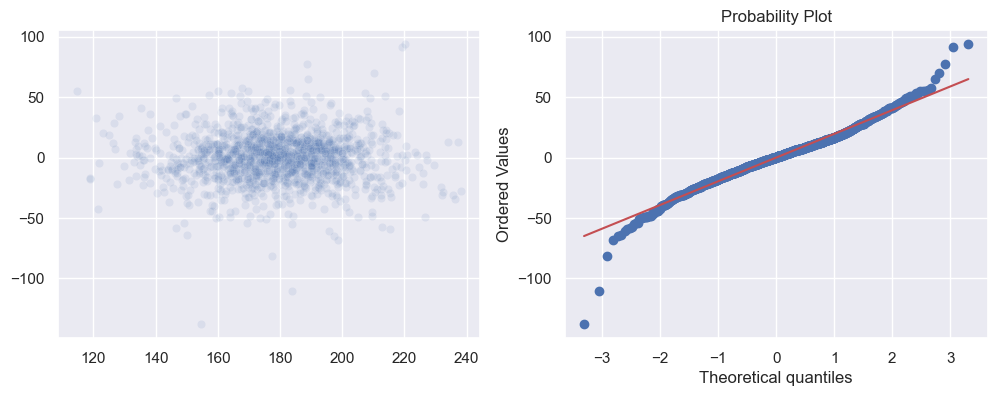

In [ ]:
errors = (pipeline.predict(X_train[features])-y_train).values
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Dispersión
sns.scatterplot(x=pipeline.predict(X_train[features]), y=errors, alpha=0.1, ax=axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

Se observa que los errores siguen una dsitribución normal, por lo tanto se puede validar este principio sin la necesidad de realizar ninguna transformacion a las variables

#### Varianza constante

<Axes: >

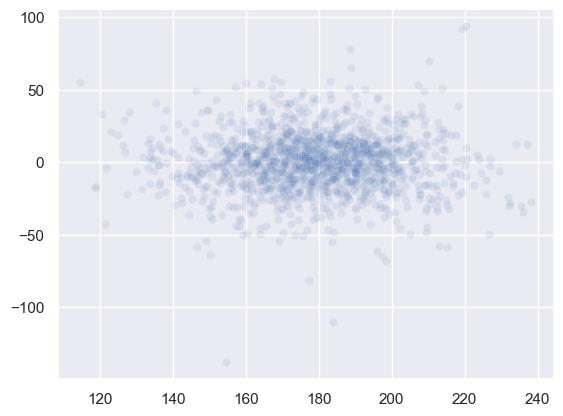

In [ ]:
sns.scatterplot(x = pipeline.predict(X_train[features]), y=errors, alpha=0.1)

Con esta grafica podemos concluir que la varianza de los errores se mantiene constante a medida que cambia la variable objetivo, por lo tanto el modelo cumple con el principio de Homocedasticidad.

# Exportar modelo usando pipelines

In [ ]:
from joblib import dump
dump(pipeline,"modelo_regresion.joblib")

['modelo_regresion.joblib']

# Predicciones para datos de prueba

In [ ]:
prueba =pd.read_csv("./data/202410_Laboratorio 2 - Regresión_val_data.csv", sep=',', encoding = "ISO-8859-1")
np.savetxt("predicciones.csv", pipeline.predict(prueba), delimiter=",")